In [9]:
import torch as th
import matplotlib.pyplot as plt
import seaborn as sns
from trainer import ema
sns.set_context('poster')
sns.set_style('dark')
#sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.7))

In [2]:
from glob import glob
all_trainers = []
for t_path in glob('saved/**/trainer', recursive=True):
    print('load ', t_path)
    all_trainers.append(th.load(t_path))

load  saved/SGD-dilvgg-nodense/0001/trainer
load  saved/SGD-dilvgg/0001/trainer
load  saved/SGD-halved-dilvgg-nodense/0001/trainer
load  saved/ADAM-dilvgg-nodense/0001/trainer
load  saved/SGD-halved-dilvgg/0001/trainer
load  saved/ADAM-dilvgg/0001/trainer
load  saved/ADAM-halved-dilvgg-nodense/0001/trainer
load  saved/ADAM-halved-dilvgg/0001/trainer
load  saved/RELU-19/0001/trainer
load  saved/RELU-19-halved/0001/trainer
load  saved/RELU-19-halved/0003/trainer
load  saved/RELU-16-double/0001/trainer
load  saved/RELU-16-quart/0001/trainer
load  saved/SELU-19/0001/trainer
load  saved/SELU-19-halved/0001/trainer
load  saved/SELU-16-double/0001/trainer
load  saved/SELU-16-quart/0001/trainer
load  saved/ADAM-SELU-16-quart/0001/trainer
load  saved/ADAM-SELU-16-quart/0003/trainer
load  saved/ADAM-RELU-19-halved/0001/trainer
load  saved/ADAM-RELU-19-halved/0003/trainer
load  saved/ADAM-SELU-19-halved/0001/trainer
load  saved/ADAM-SELU-19-halved/0003/trainer
load  saved/ADAM-RELU-16-quart/0001/

In [3]:
all_trainers.sort(key=lambda x: -x.test_highscore)
for i, T in enumerate(all_trainers, 1):
    print(i, '%.4f'%T.test_highscore, T.path, sep='\t')
    

1	0.8874	saved/SGD-dilvgg-nodense/0001
2	0.8871	saved/ADAM-halved-dilvgg/0001
3	0.8770	saved/ADAM-SELU-19-halved/0003
4	0.8761	saved/ADAM-dilvgg-nodense/0001
5	0.8732	saved/ADAM-RELU-16-double/0003
6	0.8710	saved/ADAM-RELU-19-halved/0001
7	0.8649	saved/ADAM-RELU-19/0003
8	0.8633	saved/ADAM-halved-dilvgg-nodense/0001
9	0.8633	saved/SGD-halved-dilvgg-nodense/0001
10	0.8579	saved/ADAM-SELU-19/0001
11	0.8559	saved/SELU-16-double/0001
12	0.8542	saved/ADAM-RELU-19/0001
13	0.8536	saved/ADAM-RELU-16-double/0001
14	0.8526	saved/ADAM-SELU-16-quart/0003
15	0.8476	saved/ADAM-SELU-16-quart/0001
16	0.8475	saved/ADAM-RELU-19-halved/0003
17	0.8472	saved/SGD-dilvgg/0001
18	0.8421	saved/SELU-19/0001
19	0.8419	saved/RELU-19/0001
20	0.8396	saved/RELU-19-halved/0003
21	0.8381	saved/ADAM-SELU-19-halved/0001
22	0.8367	saved/ADAM-dilvgg/0001
23	0.8335	saved/ADAM-RELU-16-quart/0001
24	0.8312	saved/ADAM-SELU-19/0003
25	0.8304	saved/RELU-16-double/0001
26	0.8290	saved/ADAM-SELU-16-double/0003
27	0.8265	saved/SEL

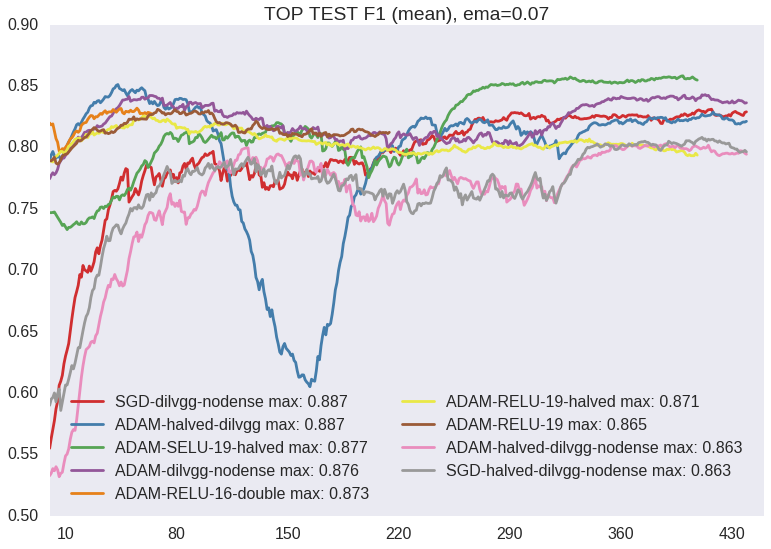

In [10]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

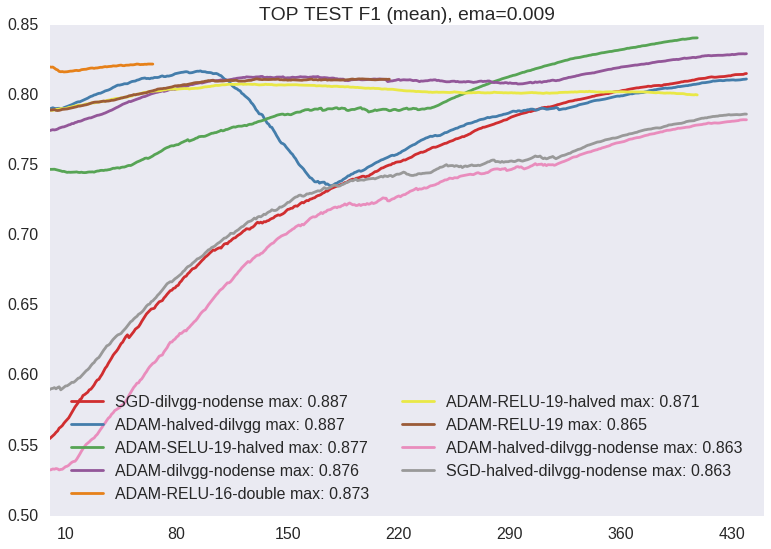

In [14]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.009):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.009')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

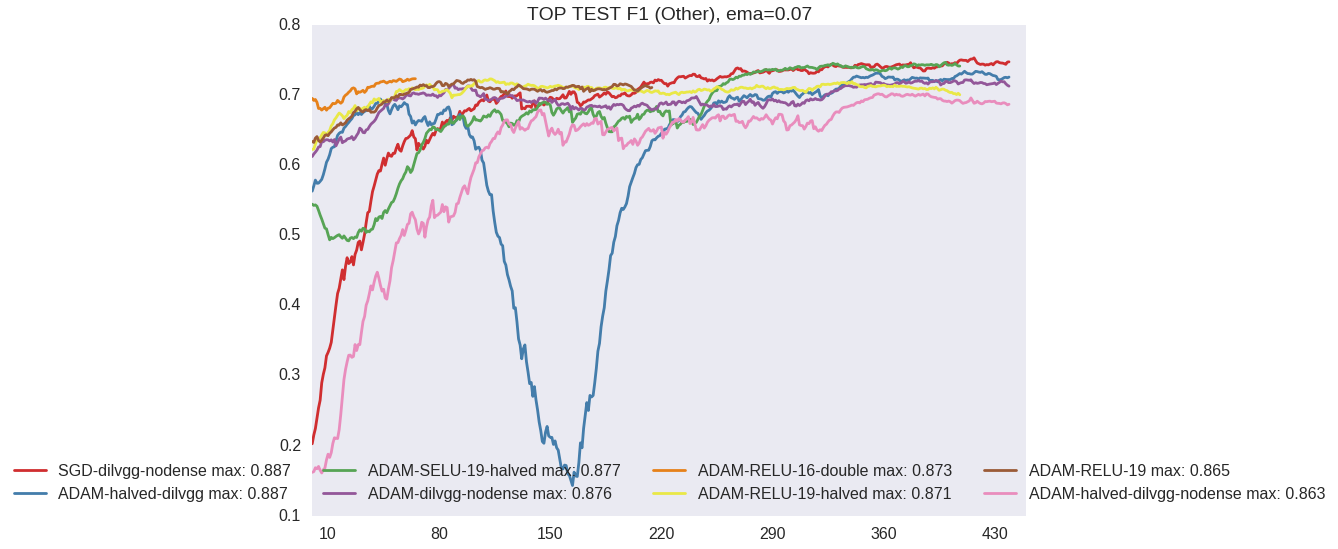

In [22]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 2], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Other), ema=0.07')
for T in all_trainers[:8]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

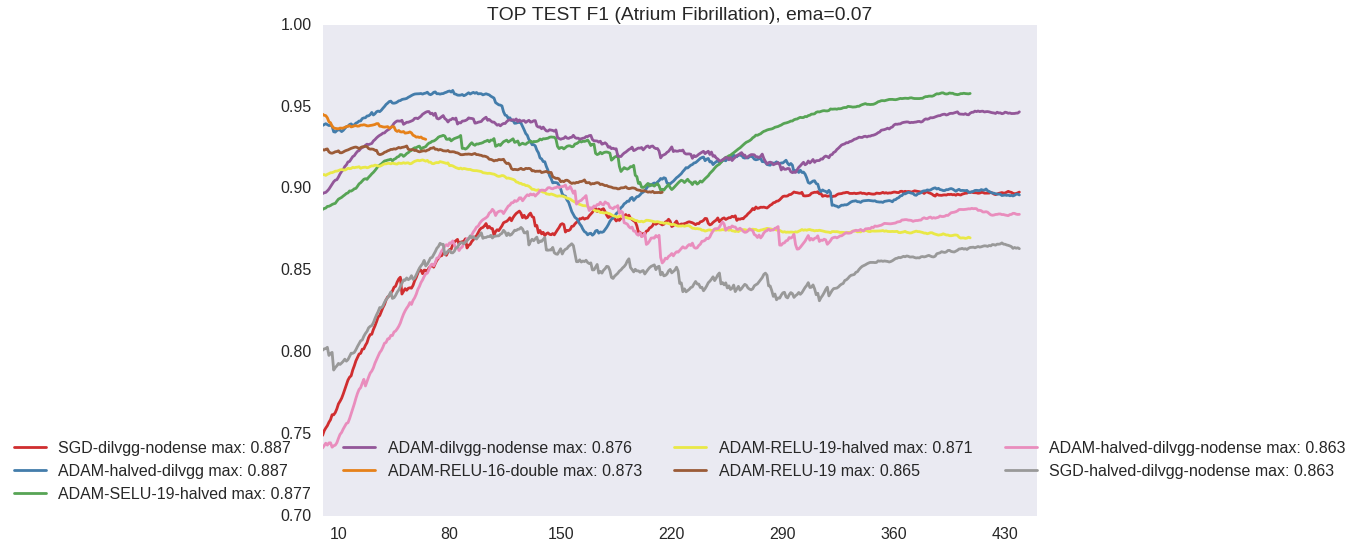

In [20]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Atrium Fibrillation), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

In [24]:
trial = 3
A = th.load('saved/ADAM-SELU-16-double/%04d/trainer'%trial)
B = th.load('saved/ADAM-RELU-16-double/%04d/trainer'%trial)
C = th.load('saved/ADAM-SELU-19-halved/%04d/trainer'%trial)
D = th.load('saved/ADAM-RELU-19-halved/%04d/trainer'%trial)
E = th.load('saved/ADAM-SELU-16-quart/%04d/trainer'%trial)
F = th.load('saved/ADAM-RELU-16-quart/%04d/trainer'%trial)
G = th.load('saved/ADAM-SELU-19/%04d/trainer'%trial)
H = th.load('saved/ADAM-RELU-19/%04d/trainer'%trial)

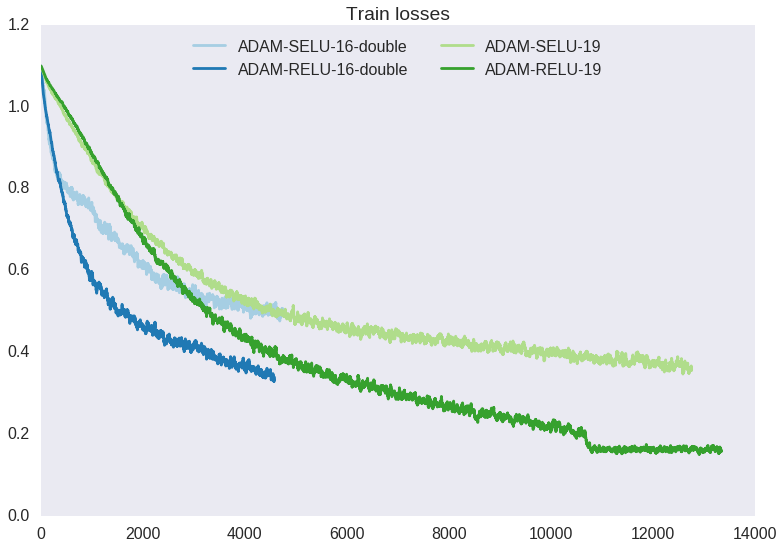

In [26]:
def add_plot(T, alpha=0.05):
    sns.set_palette(sns.color_palette("Paired", n_colors=8))
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train losses')
for T in A, B, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

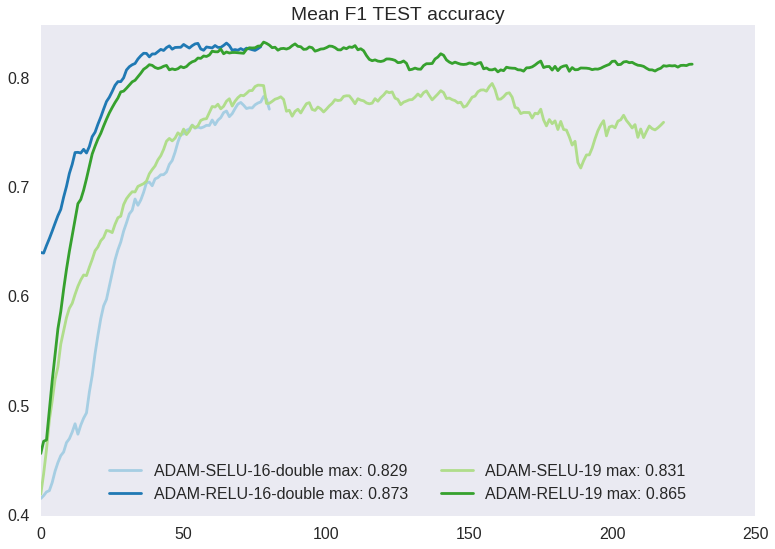

In [27]:
#%matplotlib notebook
def add_plot(T, alpha=0.1):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.7))
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('Mean F1 TEST accuracy')
for T in A, B, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

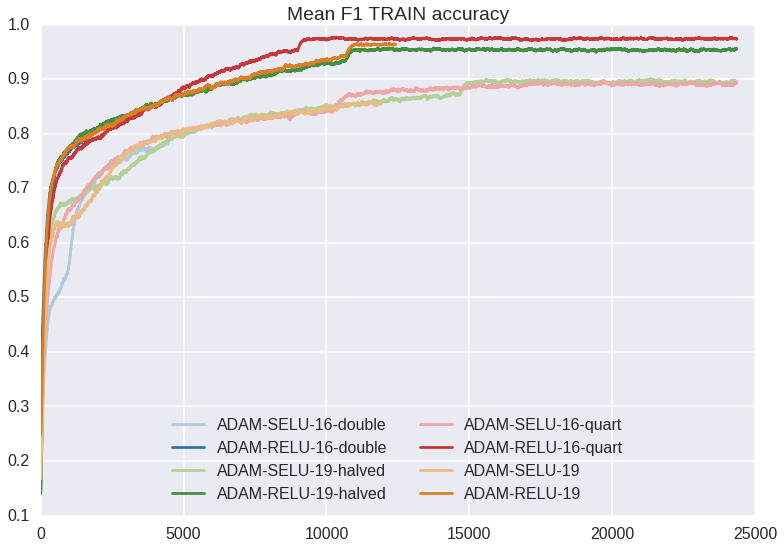

In [162]:
def add_plot(T, alpha=0.01):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.7))
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

In [149]:
def plot(T):
    
    sns.set_palette(sns.color_palette("Set1", n_colors=4, desat=.7))
    plt.close()
    print(T.path)
    f1, f2, f3 = T.plot(.01, .01, .1)
    plt.title('Test accuracy  ' + T.path)
    plt.show()
    return T

saved/ADAM-SELU-16-double/0003


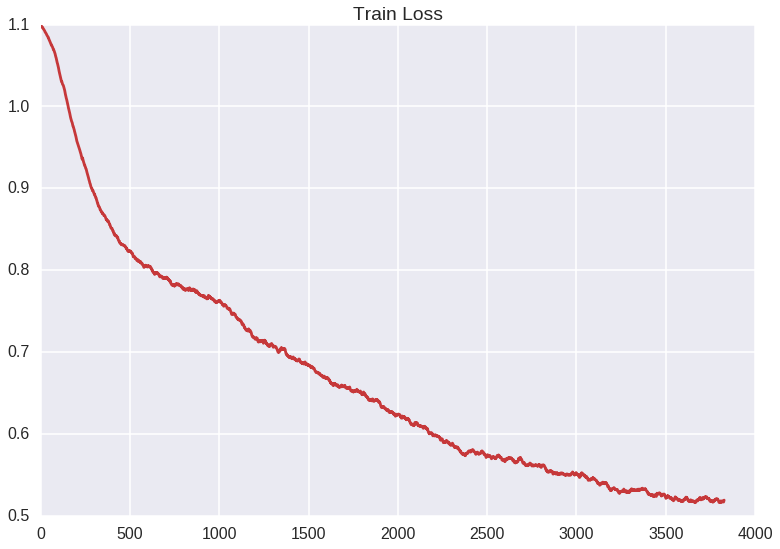

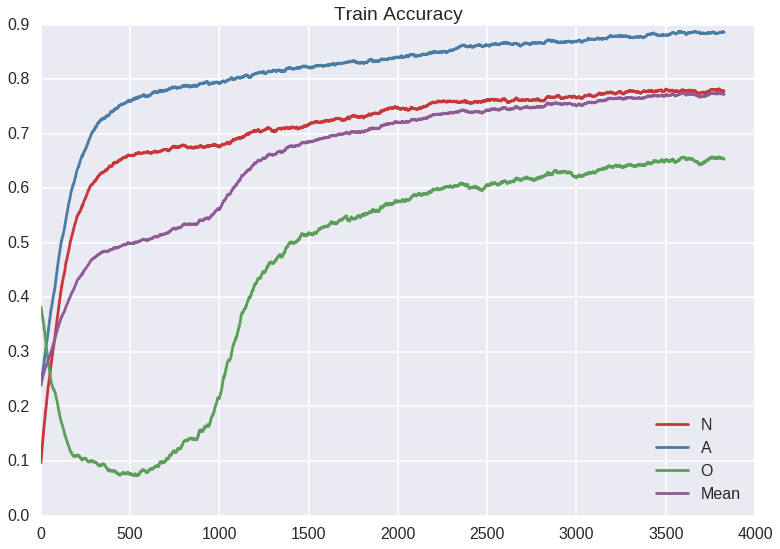

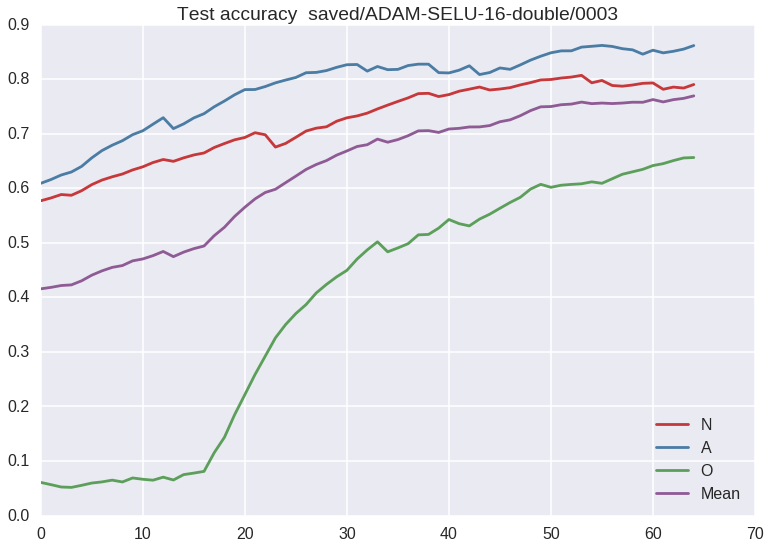

In [150]:
plot(A)
    

saved/ADAM-RELU-16-double/0003


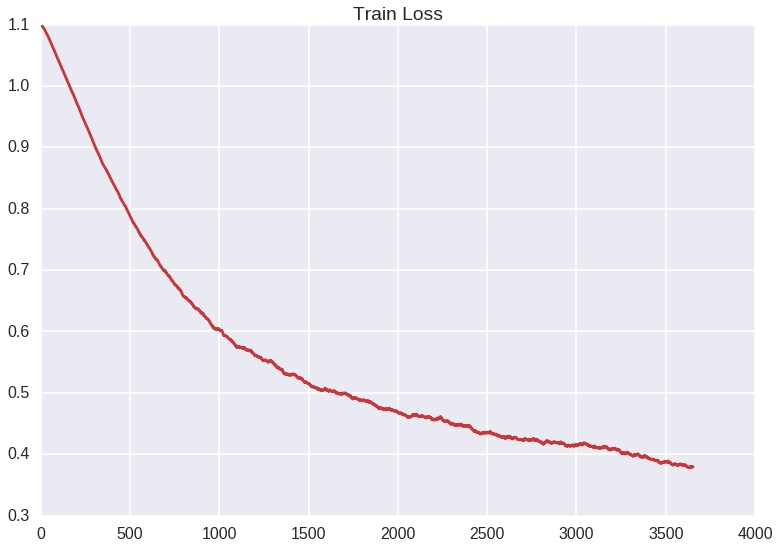

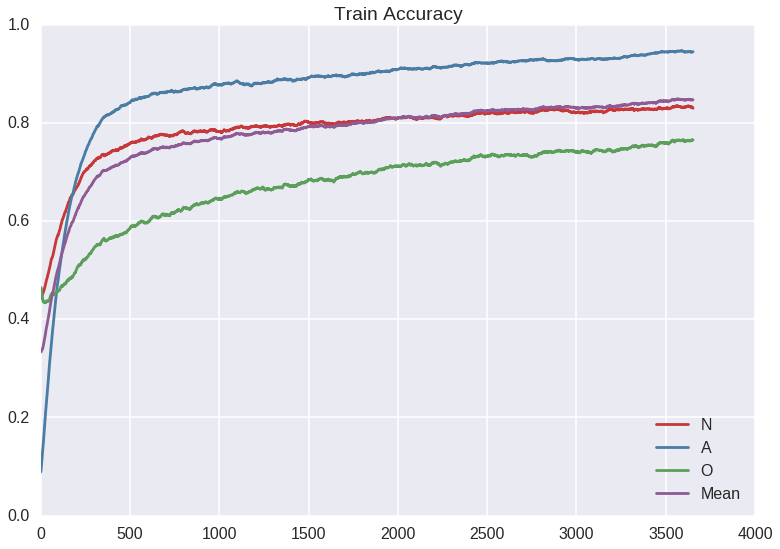

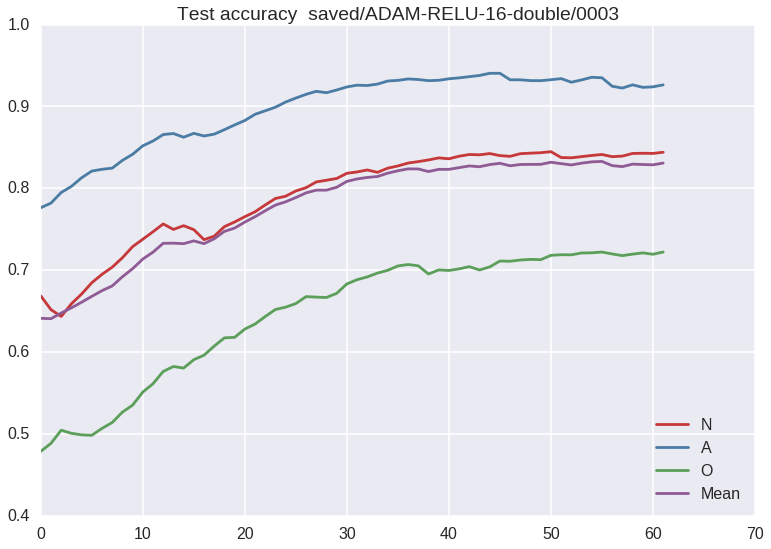

In [151]:
plot(B)
    

saved/ADAM-SELU-19-halved/0003


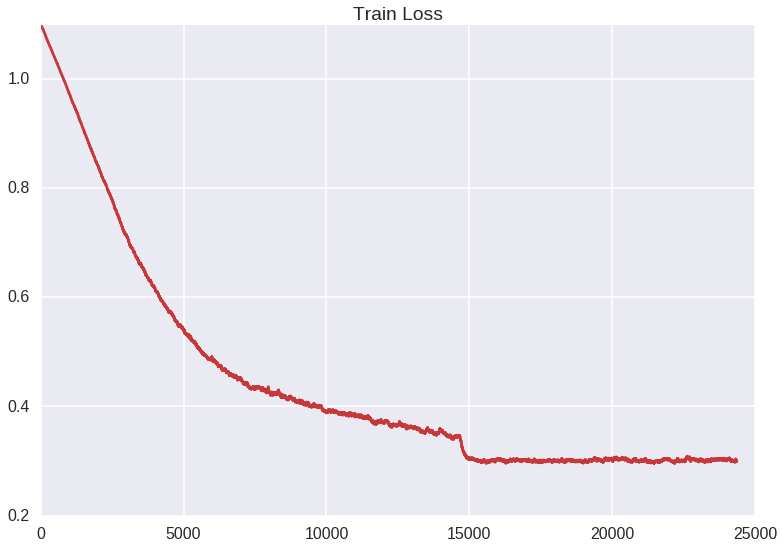

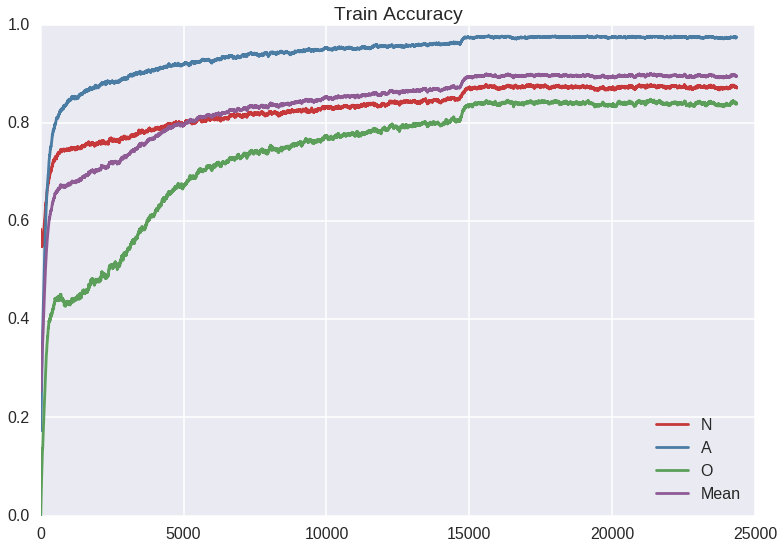

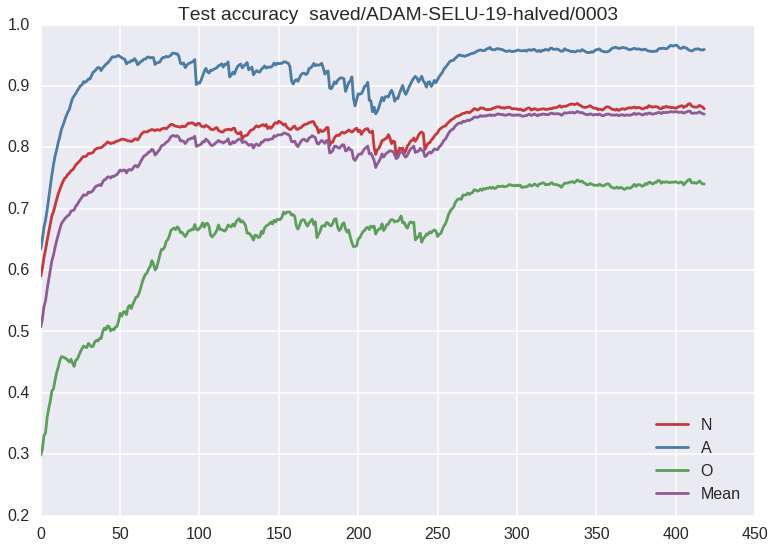

In [152]:
plot(C)
    

saved/ADAM-RELU-19-halved/0003


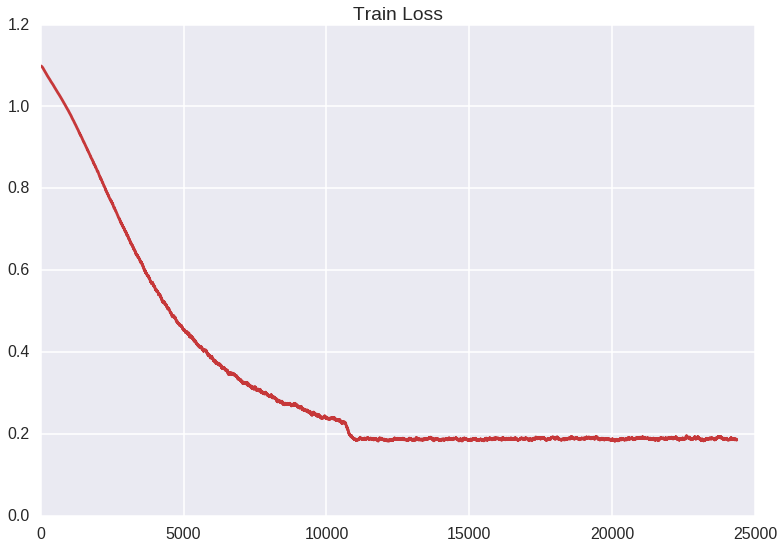

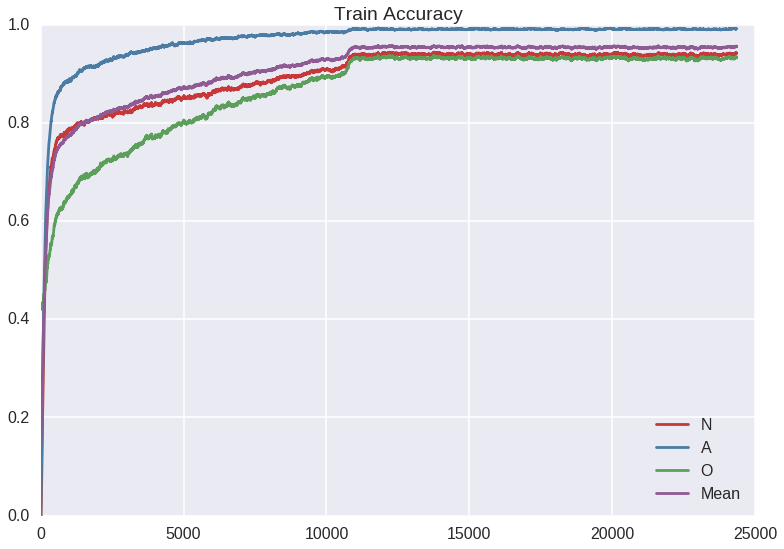

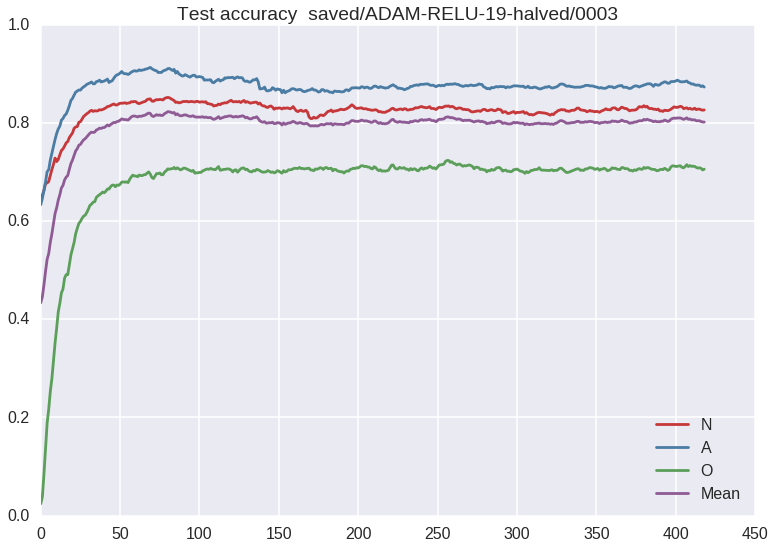

In [153]:
plot(D)
    

saved/ADAM-SELU-16-quart/0003


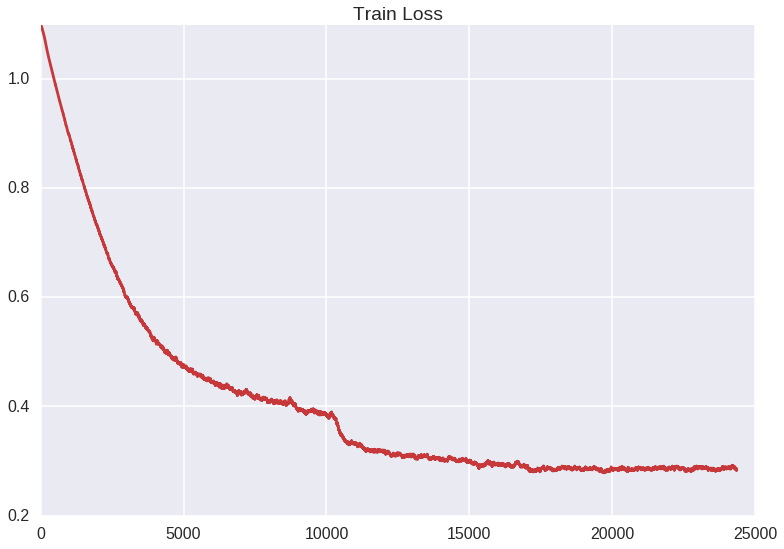

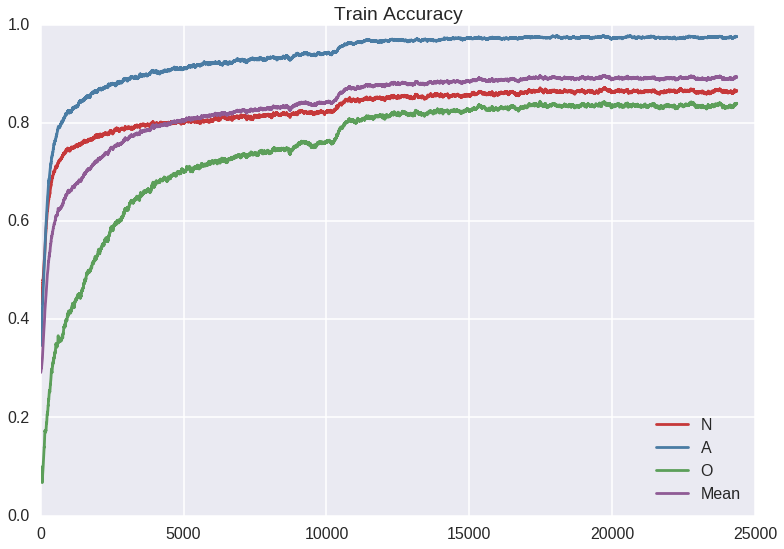

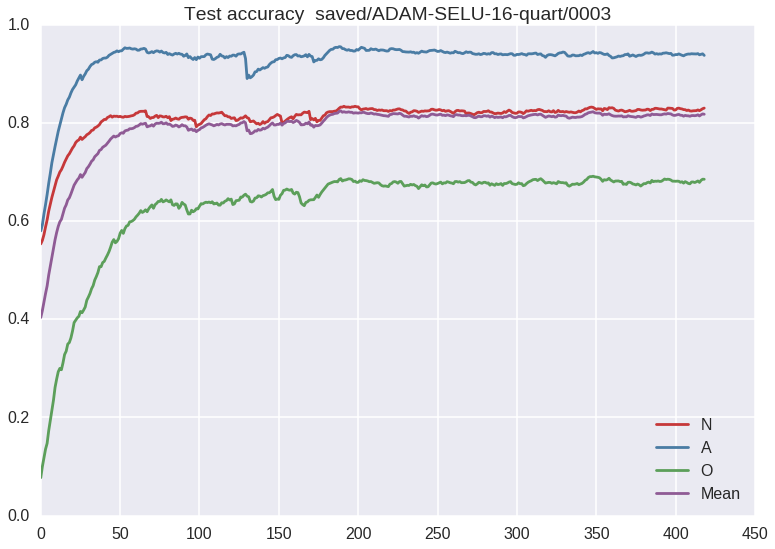

In [154]:
plot(E)
    

saved/ADAM-RELU-16-quart/0003


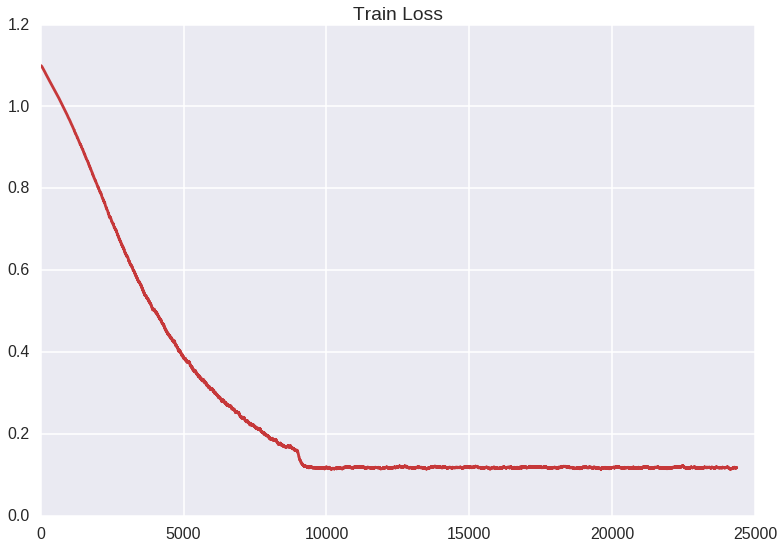

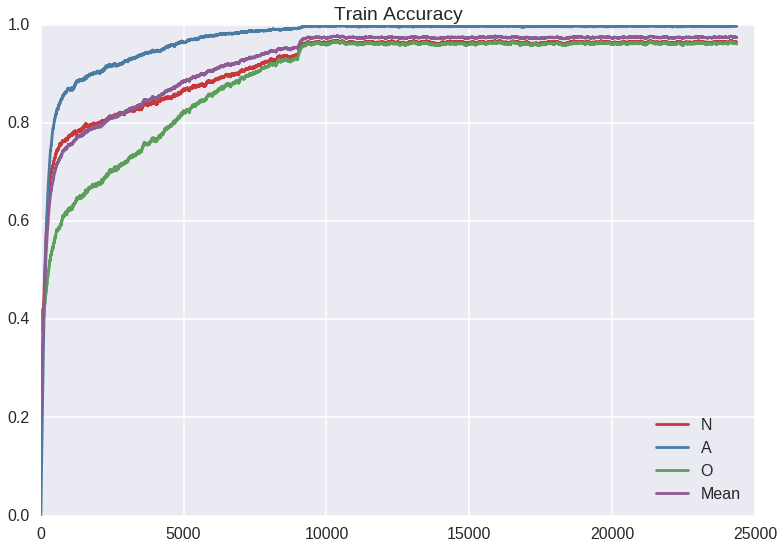

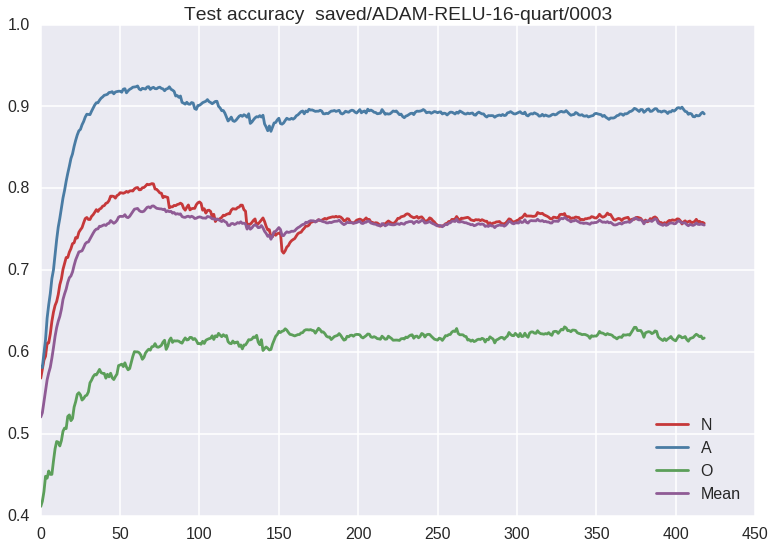

In [155]:
plot(F)
    

saved/ADAM-SELU-19/0003


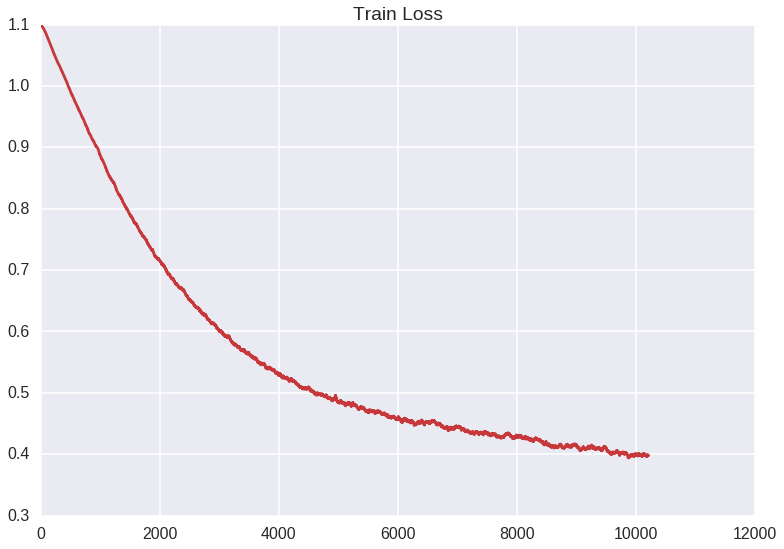

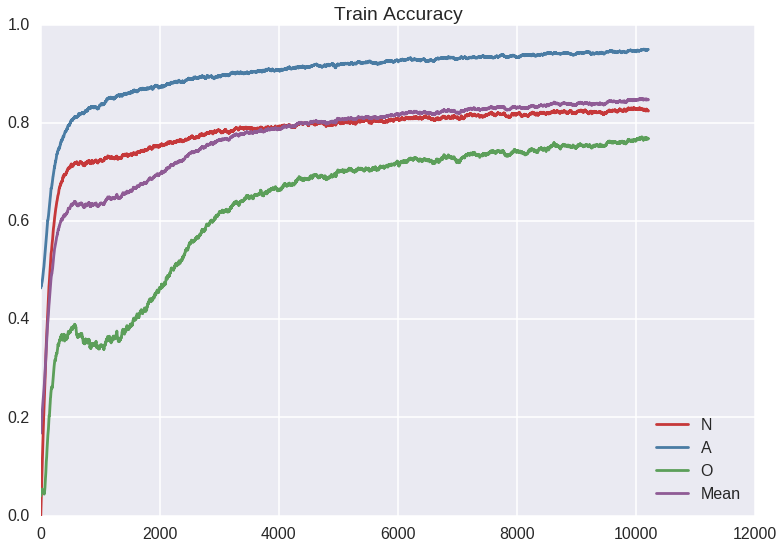

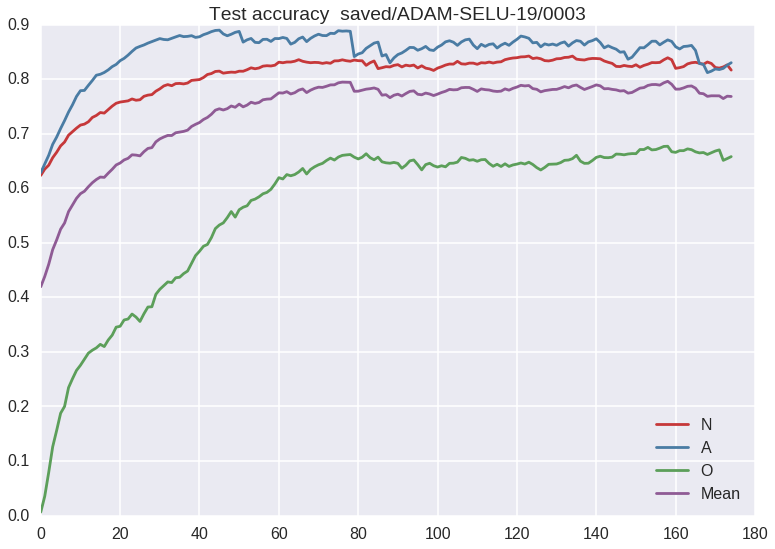

In [156]:
plot(G)
    

saved/ADAM-RELU-19/0003


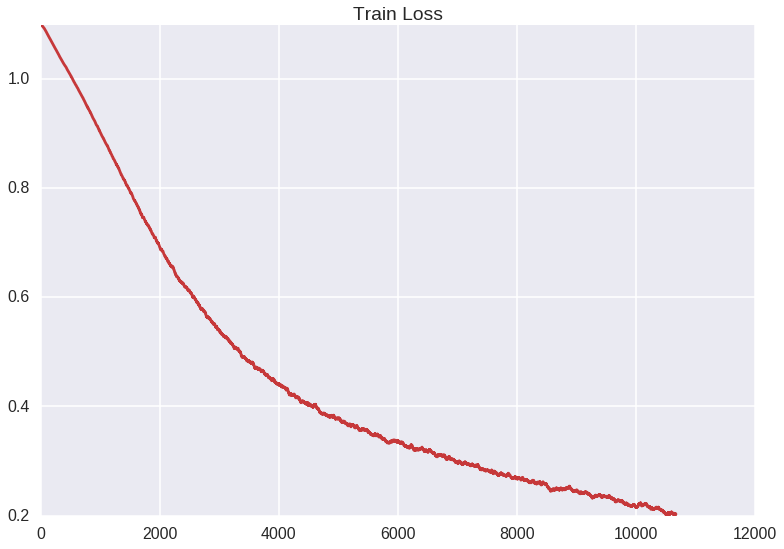

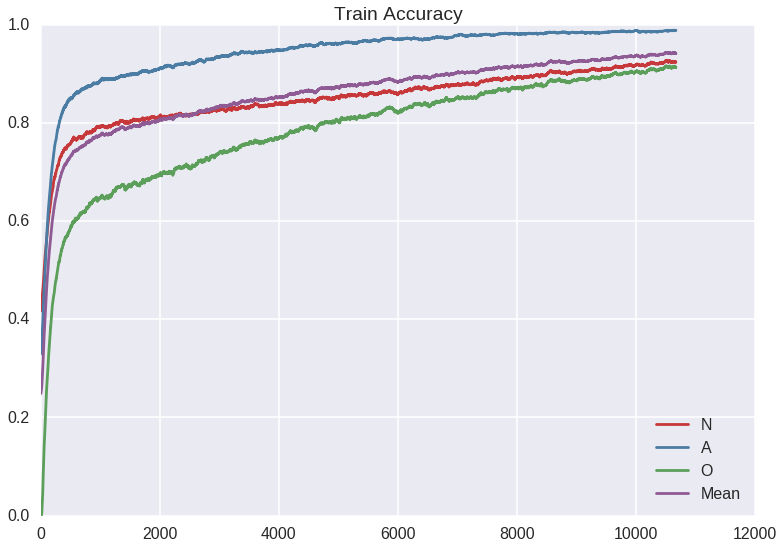

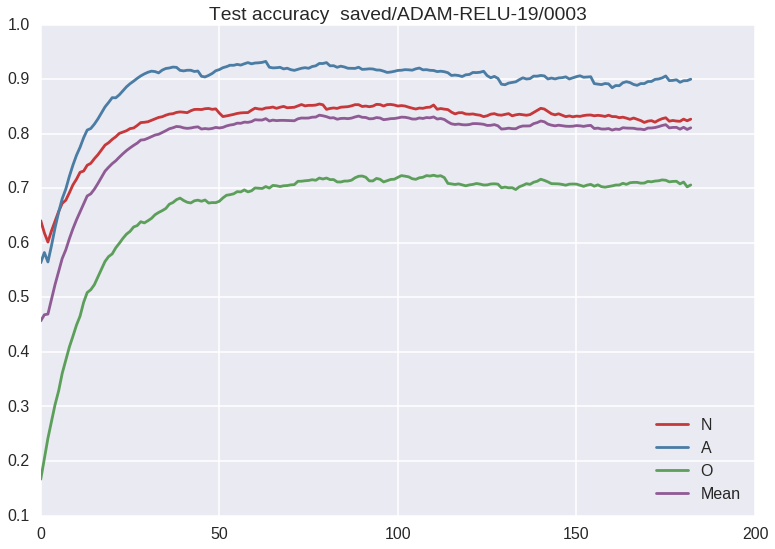

In [157]:
plot(H)
    

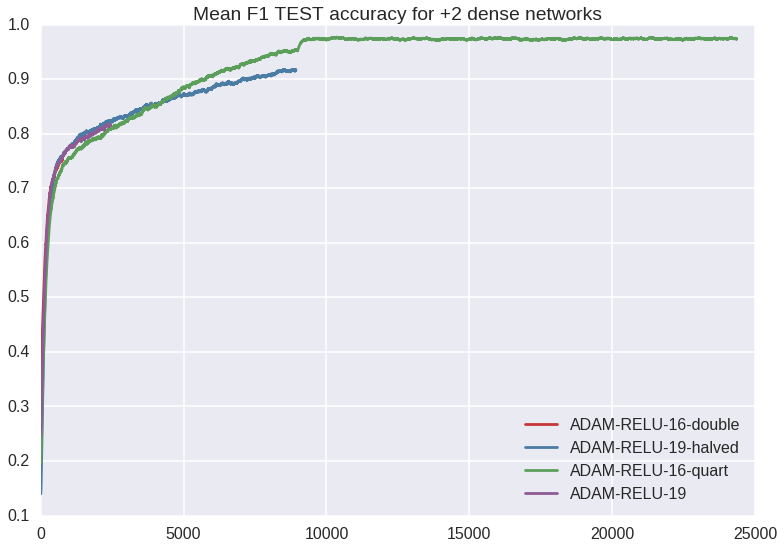

In [43]:
# plt.close()
plt.title('Mean F1 TEST accuracy for +2 dense networks')
add_plot(B)
add_plot(D)
add_plot(F)
add_plot(H)
plt.legend(loc='lower right')
plt.show()

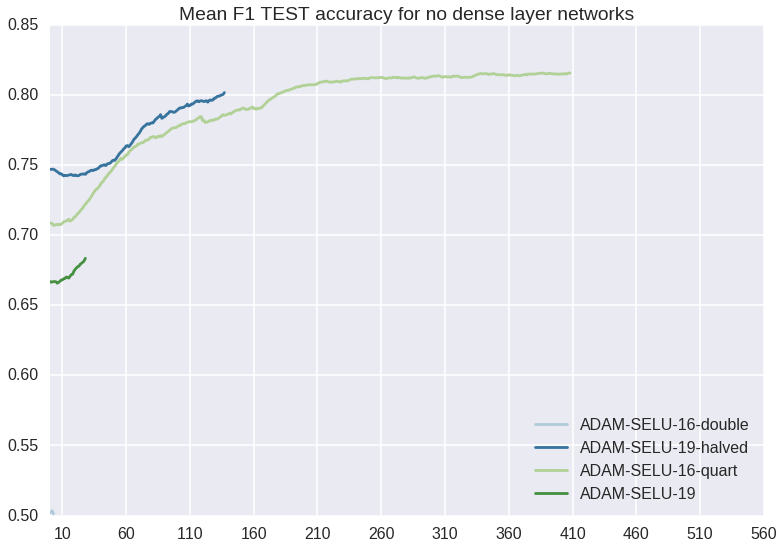

In [44]:
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:600, -1], alpha), label=T.path[6:-5])
plt.close()
plt.title('Mean F1 TEST accuracy for no dense layer networks')
add_plot(A)
add_plot(C)
add_plot(E)
add_plot(G)
plt.legend(loc='lower right')
plt.xticks(range(10, 600, 50))
plt.show()

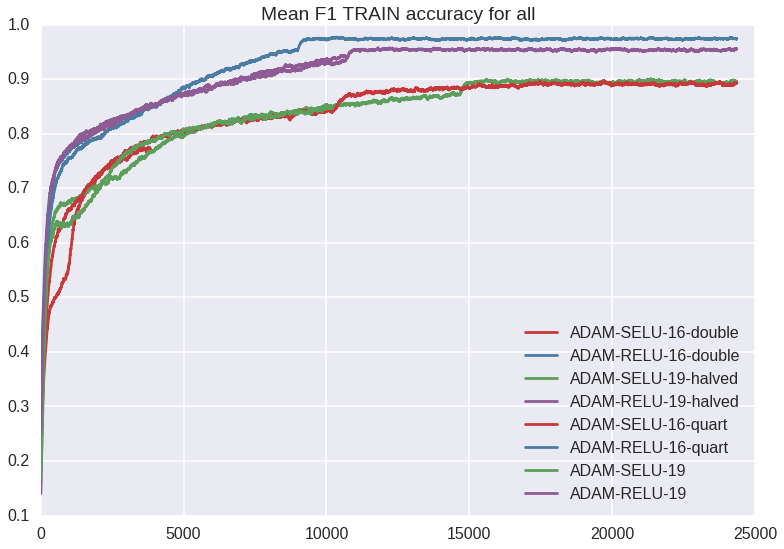

In [158]:
plt.close()
plt.title('Mean F1 TRAIN accuracy for all')
def add_plot(T, alpha=0.01):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])

for T in A, B, C, D, E, F, G, H:
    add_plot(T)
    
plt.legend(loc='lower right')
plt.show()